In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data 불러오기

In [712]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [713]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [714]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [715]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [716]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [717]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [718]:
train_Id = train['Id']
test_Id = test['Id']

In [719]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# 데이터 시각화

## SalePrice dist

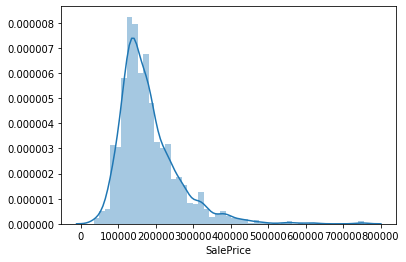

In [720]:
sns.distplot(train['SalePrice'])

## Corr

In [721]:
train_corr = train.corr()

In [722]:
train_corr_desc = train_corr['SalePrice'].sort_values(ascending=False)

In [723]:
train_corr_desc = train_corr_desc[train_corr_desc > 0.3]

Text(0.5, 1.0, 'Correlation with SalePrice and others')

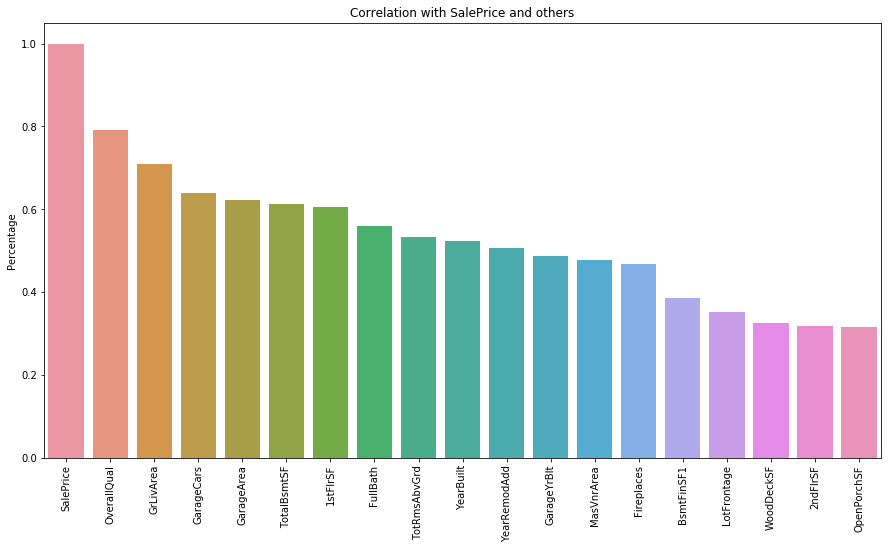

In [724]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=train_corr_desc.index, y=train_corr_desc)
plt.xticks(rotation='90')
plt.ylabel('Percentage')
plt.title('Correlation with SalePrice and others')

In [725]:
corr_index_03 = train_corr_desc.index

In [726]:
corr_index_03 = corr_index_03.delete(0)

In [727]:
corr_index_03 # 

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

In [728]:
train.shape

(1460, 80)

## Outliers

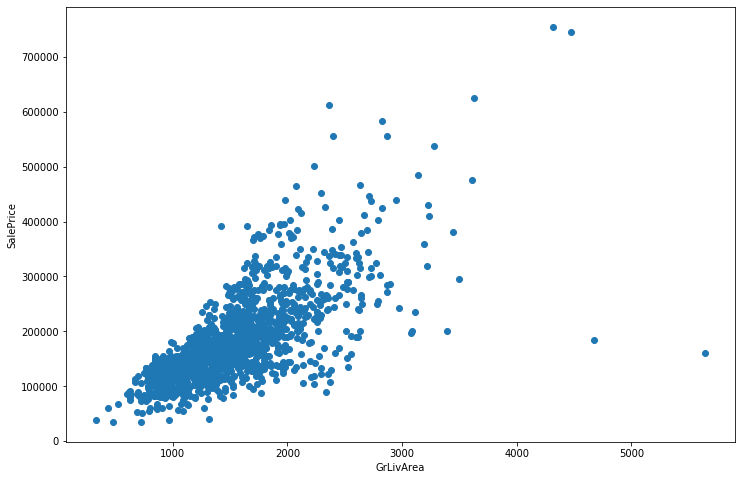

In [729]:
f, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [730]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

In [731]:
train.shape

(1458, 80)

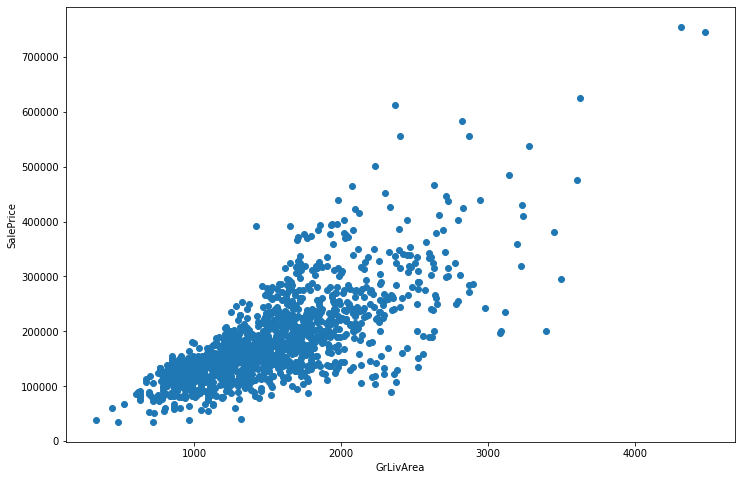

In [732]:
f, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [733]:
corr_index_03

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

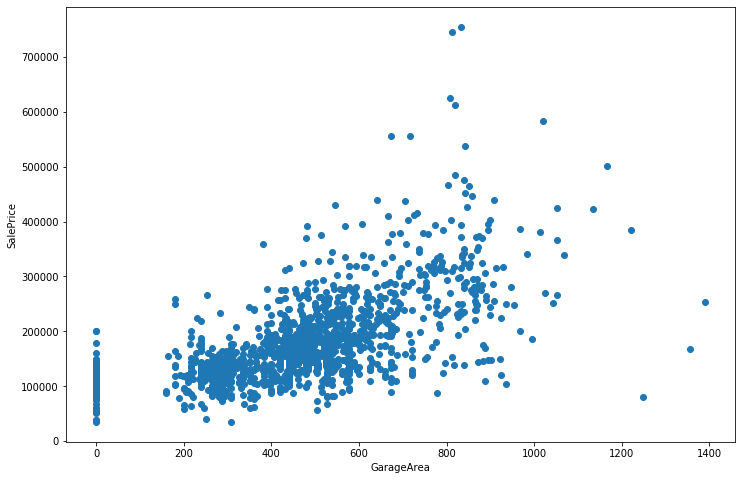

In [734]:
f, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train['GarageArea'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

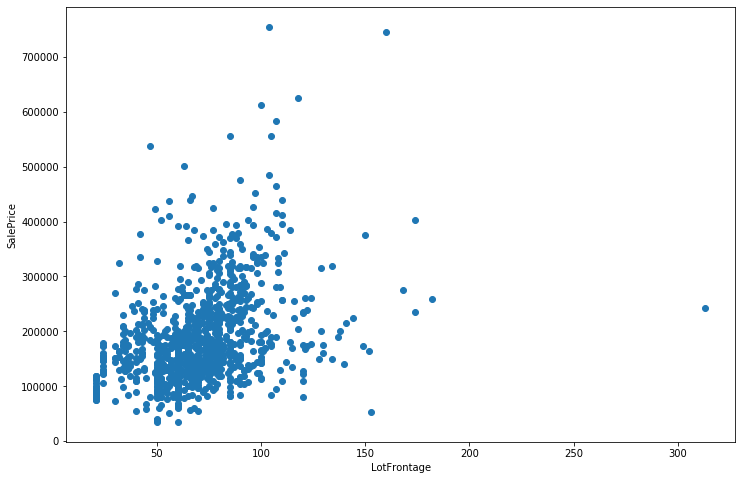

In [735]:
f, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train['LotFrontage'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
plt.show()

In [736]:
train = train.drop(train[train['LotFrontage']>250].index)

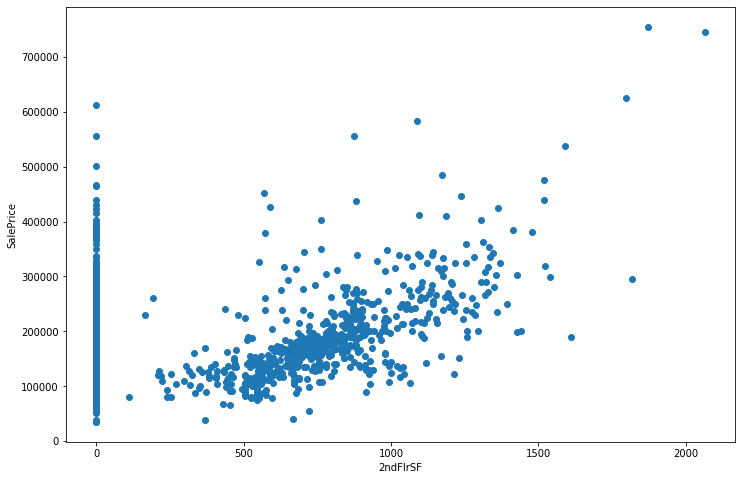

In [737]:
f, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train['2ndFlrSF'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('2ndFlrSF')
plt.show()

In [738]:
train.shape, test.shape

((1457, 80), (1459, 79))

# Missing Values

## train test concat

In [739]:
n_train = train.shape[0]
n_test = test.shape[0]

print(n_train)
ntest

1457


1459

In [740]:
y_train = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

all_data.shape

(2916, 79)

In [741]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## MissingValues

In [742]:
all_data_miss = all_data.isnull().sum().sort_values(ascending=False) / len(all_data)

In [743]:
all_data_miss = all_data_miss[:50]

In [744]:
all_data_miss

PoolQC          0.996914
MiscFeature     0.963992
Alley           0.932099
Fence           0.804184
FireplaceQu     0.486968
LotFrontage     0.166667
GarageCond      0.054527
GarageQual      0.054527
GarageYrBlt     0.054527
GarageFinish    0.054527
GarageType      0.053841
BsmtCond        0.028121
BsmtExposure    0.028121
BsmtQual        0.027778
BsmtFinType2    0.027435
BsmtFinType1    0.027092
MasVnrType      0.008230
MasVnrArea      0.007888
MSZoning        0.001372
BsmtHalfBath    0.000686
Utilities       0.000686
Functional      0.000686
BsmtFullBath    0.000686
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
Exterior2nd     0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Exterior1st     0.000343
SaleType        0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageArea      0.000343
GarageCars      0.000343
OverallQual     0.000000
OverallCond     0.000000
LotArea         0.000000
Street          0.000000
LotShape        0.000000
LandContour     0.000000


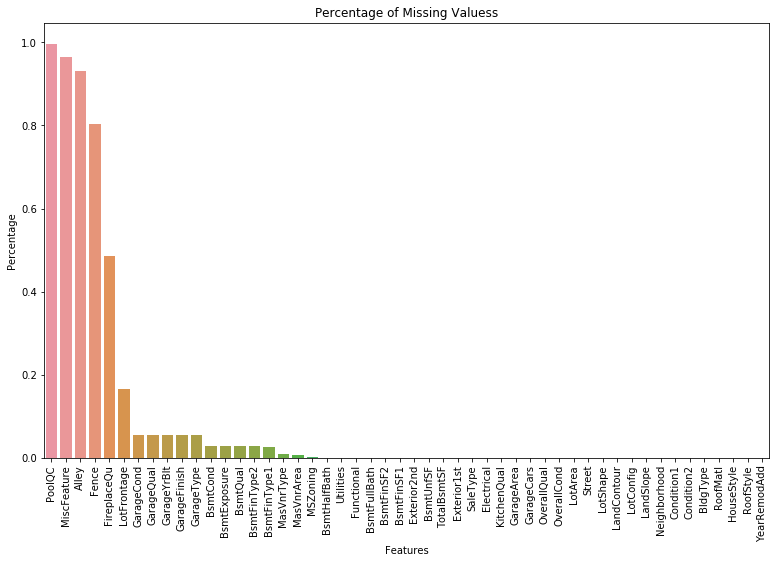

In [745]:
f, ax = plt.subplots(figsize=(13,8))
sns.barplot(x=all_data_miss.index, y=all_data_miss)
plt.xticks(rotation='90')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Valuess')
plt.show()

In [746]:
for i in all_data_miss[:5].index:
    del all_data[i]

- PoolQC ~ FireplaceQu 열 지워주기

In [747]:
all_data.shape

(2916, 74)

- 나머지 결측치 중 dtpye이 object는 None으로 채우고 float은 0으로 채우기

In [748]:
all_data_miss = all_data_miss[5:]

In [749]:
all_data_miss

LotFrontage     0.166667
GarageCond      0.054527
GarageQual      0.054527
GarageYrBlt     0.054527
GarageFinish    0.054527
GarageType      0.053841
BsmtCond        0.028121
BsmtExposure    0.028121
BsmtQual        0.027778
BsmtFinType2    0.027435
BsmtFinType1    0.027092
MasVnrType      0.008230
MasVnrArea      0.007888
MSZoning        0.001372
BsmtHalfBath    0.000686
Utilities       0.000686
Functional      0.000686
BsmtFullBath    0.000686
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
Exterior2nd     0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Exterior1st     0.000343
SaleType        0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageArea      0.000343
GarageCars      0.000343
OverallQual     0.000000
OverallCond     0.000000
LotArea         0.000000
Street          0.000000
LotShape        0.000000
LandContour     0.000000
LotConfig       0.000000
LandSlope       0.000000
Neighborhood    0.000000
Condition1      0.000000
Condition2      0.000000


In [750]:
miss_index = all_data_miss.index

In [751]:
all_data[miss_index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2430 non-null   float64
 1   GarageCond    2757 non-null   object 
 2   GarageQual    2757 non-null   object 
 3   GarageYrBlt   2757 non-null   float64
 4   GarageFinish  2757 non-null   object 
 5   GarageType    2759 non-null   object 
 6   BsmtCond      2834 non-null   object 
 7   BsmtExposure  2834 non-null   object 
 8   BsmtQual      2835 non-null   object 
 9   BsmtFinType2  2836 non-null   object 
 10  BsmtFinType1  2837 non-null   object 
 11  MasVnrType    2892 non-null   object 
 12  MasVnrArea    2893 non-null   float64
 13  MSZoning      2912 non-null   object 
 14  BsmtHalfBath  2914 non-null   float64
 15  Utilities     2914 non-null   object 
 16  Functional    2914 non-null   object 
 17  BsmtFullBath  2914 non-null   float64
 18  BsmtFinSF2    2915 non-null 

In [752]:
all_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF',
        'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageCars', 'GarageArea']] = \
all_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF',
        'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageCars', 'GarageArea']].fillna(0)

In [753]:
all_data[['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 
         'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'SaleType', 'Exterior2nd',
         'Exterior1st', 'Electrical', 'KitchenQual']] = \
all_data[['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 
         'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'SaleType', 'Exterior2nd',
         'Exterior1st', 'Electrical', 'KitchenQual']].fillna('None')

In [754]:
all_data.isnull().sum().sort_values(ascending=False).head(10)

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
dtype: int64

In [755]:
all_data.shape

(2916, 74)

# Feature engineering

## numerical but categorical

In [756]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [757]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for i in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[i].values))
    all_data[i] = lbl.transform(list(all_data[i].values))
    
print("Shape of all data: {}".format(all_data.shape))

Shape of all data: (2916, 74)


In [758]:
print(n_train)
print(n_test)


1457
1459


In [759]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2916, 218)

In [760]:
train = all_data[:n_train]
test = all_data[n_train:]

In [761]:
train.shape, test.shape

((1457, 218), (1459, 218))

# dataset

In [762]:
X_train = train
y_train = y_train
X_test = test


In [763]:
len(X_train)

1457

In [764]:
len(y_train)

1457

# Model

## RandomForest

In [765]:
from sklearn.ensemble import RandomForestRegressor

In [766]:
model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [767]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [771]:
y_predict = model.predict(X_test)

In [772]:
len(y_predict)

1459

## cross val predict

In [775]:
from sklearn.model_selection import cross_val_predict
y_predict1 = cross_val_predict(model, X_train, y_train,
                              cv=5, verbose=5, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


In [776]:
len(y_predict1)

1457

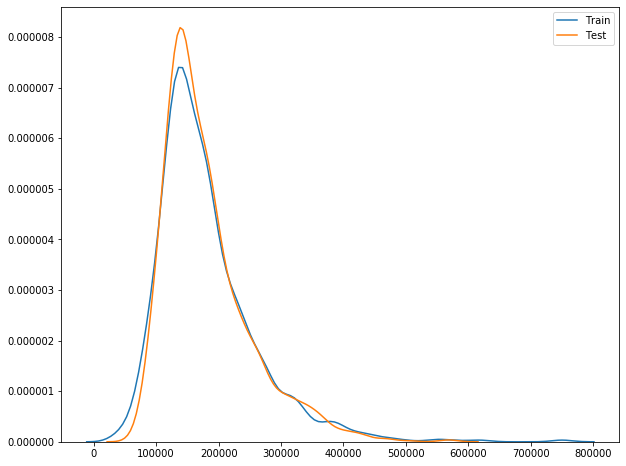

In [777]:
f, ax = plt.subplots(figsize=(10,8))
sns.distplot(y_train, hist=False, label='Train')
sns.distplot(y_predict1, hist=False, label='Test')

## RandomizedSearchCV

In [778]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [779]:
estimators = [DecisionTreeRegressor(random_state=42),
             RandomForestRegressor(random_state=42),
             GradientBoostingRegressor(random_state=42)]

In [782]:
RandomizedSearchCV?

In [781]:
param_distributions = {'max_depth': np.random.randint(3,20,100),
                      'max_features': np.random.uniform(0.3, 1.0, 100)}

In [784]:
results = []

for estimator in estimators:
    result = []
    
    regressor = RandomizedSearchCV(estimator,
                                  param_distributions=param_distributions,
                                  n_iter=100,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=42)
    
    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


In [785]:
results

[['DecisionTreeRegressor',
  {'max_features': 0.8808162353997429, 'max_depth': 5},
  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                        max_features=0.8808162353997429, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
  0.790004829540581,
  {'mean_fit_time': array([0.013273  , 0.02615471, 0.01627941, 0.01364059, 0.04079385,
          0.04550261, 0.03165908, 0.04775467, 0.0125236 , 0.04890294,
          0.02824907, 0.03414211, 0.02661638, 0.01419849, 0.0229743 ,
          0.01127806, 0.01829939, 0.04699097, 0.01072154, 0.04112887,
          0.01223855, 0.03412375, 0.01356516, 0.02580791, 0.023525  ,
          0.01830192, 0.02080922, 0.02626624, 0.01010647, 0.0247108 ,
          0.02799587, 0.03343339, 0.

In [788]:
df_cv = pd.DataFrame(results, columns=['model', 'params', 'estimator', 'score', 'cv_result'])

In [789]:
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.8808162353997429, 'max_dept...","DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.790005,"{'mean_fit_time': [0.013273000717163086, 0.026..."
1,RandomForestRegressor,"{'max_features': 0.4700803590170096, 'max_dept...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.899099,"{'mean_fit_time': [0.9090474128723145, 1.56410..."
2,GradientBoostingRegressor,"{'max_features': 0.5107679456792726, 'max_dept...","([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.919405,"{'mean_fit_time': [1.197968339920044, 2.490667..."


In [790]:
best_estimator = df_cv.loc[2, 'estimator']

In [795]:
pd.DataFrame(df_cv.loc[2, 'cv_result']).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
53,0.663744,0.010868,0.003182,0.000082,0.510768,4,"{'max_features': 0.5107679456792726, 'max_dept...",0.917762,0.926270,0.911010,0.922985,0.919000,0.919405,0.005163,1
28,0.354797,0.003761,0.003181,0.000167,0.321784,3,"{'max_features': 0.32178356115428947, 'max_dep...",0.916611,0.923074,0.912758,0.920379,0.919466,0.918458,0.003519,2
20,0.656737,0.012133,0.003302,0.000040,0.499198,4,"{'max_features': 0.4991983989101015, 'max_dept...",0.912724,0.923511,0.909220,0.921454,0.921273,0.917637,0.005609,3
35,0.522138,0.009408,0.003042,0.000083,0.516585,3,"{'max_features': 0.5165846534102196, 'max_dept...",0.907857,0.926115,0.909176,0.921789,0.915414,0.916070,0.007057,4
8,0.695301,0.013366,0.003277,0.000159,0.665901,3,"{'max_features': 0.6659011751963306, 'max_dept...",0.909287,0.926108,0.905861,0.921320,0.914468,0.915409,0.007469,5


In [796]:
best_estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=0.5107679456792726, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## best_estimator로 y_predict만들기

In [799]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=0.5107679456792726, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [800]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=0.5107679456792726, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [802]:
y_predict = model.predict(X_test)

In [803]:
len(y_predict)

1459

# Submission

In [804]:
submission = pd.read_csv('data/sample_submission.csv')

In [805]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [806]:
submission['SalePrice'] = y_predict

In [807]:
submission.to_csv('data/submission6.csv', index=False)

In [ ]:
# sub5/RandomForest = 0.14943 
# sub6/Best_estimator = 0.13832